# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# *******REMEMBER TO CHANGE THE SIZE BACK TO 1500********
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Build query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold response info
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    print(f"Processing Record | {city}")
   
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print(f"{city} not found. Skipping...")
        pass




Beginning Data Retrieval
------------------------
Processing Record | bengkulu
Processing Record | rikitea
Processing Record | albany
Processing Record | iskateley
Processing Record | belushya guba
belushya guba not found. Skipping...
Processing Record | basco
Processing Record | barrow
Processing Record | cherskiy
Processing Record | grindavik
Processing Record | nabire
Processing Record | mayo
Processing Record | tancheng
Processing Record | matveyev kurgan
Processing Record | hermanus
Processing Record | buchanan
Processing Record | busselton
Processing Record | mataura
Processing Record | lamar
Processing Record | port hardy
Processing Record | rawson
Processing Record | codrington
Processing Record | nizhneyansk
nizhneyansk not found. Skipping...
Processing Record | atuona
Processing Record | eldorado
Processing Record | ponta do sol
Processing Record | saldanha
Processing Record | onega
Processing Record | rapid city
Processing Record | faanui
Processing Record | punta arenas
Pro

Processing Record | port blair
Processing Record | tabas
Processing Record | shumskiy
Processing Record | ust-kut
Processing Record | nishihara
Processing Record | chippewa falls
Processing Record | ondo
Processing Record | bucerias
Processing Record | alofi
Processing Record | sohag
Processing Record | bradford
Processing Record | turukhansk
Processing Record | sao filipe
Processing Record | dao
Processing Record | clyde river
Processing Record | gorodovikovsk
Processing Record | nanortalik
Processing Record | yantal
Processing Record | salalah
Processing Record | arman
Processing Record | usolye
Processing Record | mount isa
Processing Record | plouzane
Processing Record | vaitupu
vaitupu not found. Skipping...
Processing Record | outjo
Processing Record | cabedelo
Processing Record | lorengau
Processing Record | marzuq
Processing Record | sibolga
Processing Record | imbituba
Processing Record | alta floresta
Processing Record | cerrito
Processing Record | anadyr
Processing Record | 

Processing Record | bilma
Processing Record | ciudad bolivar
Processing Record | sarangani
Processing Record | north bend
Processing Record | ruatoria
ruatoria not found. Skipping...
Processing Record | malanje
Processing Record | pangody
Processing Record | fierze
fierze not found. Skipping...
Processing Record | huallanca
Processing Record | madarounfa
Processing Record | namatanai
Processing Record | kavaratti
Processing Record | bay roberts
Processing Record | hervey bay
Processing Record | yulara
Processing Record | venado tuerto
Processing Record | birao
Processing Record | comodoro rivadavia
Processing Record | chapais
Processing Record | catuday
Processing Record | mugango
Processing Record | lulea
Processing Record | necochea
Processing Record | alto araguaia
Processing Record | ulaangom
Processing Record | praia da vitoria
Processing Record | chinsali
Processing Record | port alberni
Processing Record | vangaindrano
Processing Record | halalo
halalo not found. Skipping...
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary so we can create a dataframe
weather_data = {
    "City": cities,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Create dataframe
weather_data_df = pd.DataFrame.from_dict(weather_data, orient='index')
weather_data_df = weather_data_df.transpose()
weather_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bengkulu,-3.8,102.27,83.73,65,70,4.27,ID,1595647314
1,rikitea,-23.12,-134.97,68.5,76,0,20,PF,1595647234
2,albany,42.6,-73.97,73.99,70,0,2.17,US,1595647239
3,iskateley,67.68,53.15,63.95,62,0,9.71,RU,1595647367
4,belushya guba,20.45,121.97,85.66,78,42,12.39,PH,1595647367
...,...,...,...,...,...,...,...,...,...
617,hovd,None,None,None,None,None,None,None,None
618,eenhana,None,None,None,None,None,None,None,None
619,englehart,None,None,None,None,None,None,None,None
620,jaen,None,None,None,None,None,None,None,None


In [5]:
# Export dataframe to csv
weather_data_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data_df = weather_data_df[weather_data_df['Humidity'] <= 100]
clean_city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bengkulu,-3.8,102.27,83.73,65,70,4.27,ID,1595647314
1,rikitea,-23.12,-134.97,68.5,76,0,20,PF,1595647234
2,albany,42.6,-73.97,73.99,70,0,2.17,US,1595647239
3,iskateley,67.68,53.15,63.95,62,0,9.71,RU,1595647367
4,belushya guba,20.45,121.97,85.66,78,42,12.39,PH,1595647367
...,...,...,...,...,...,...,...,...,...
572,bandar-e anzali,48.01,91.64,74.79,35,2,1.5,MN,1595647441
573,muisne,-17.47,16.33,55.4,45,0,4.7,NA,1595647266
574,chirongui,47.82,-79.87,66.2,72,1,8.05,CA,1595647441
575,nome,38,-3.5,81,37,0,2.86,ES,1595647441


In [10]:
# Export the City_Data into a csv
clean_city_data_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

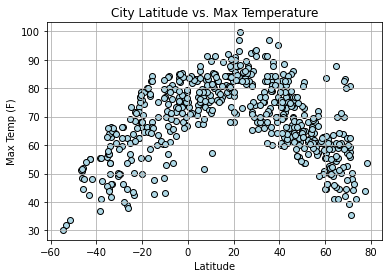

In [23]:
# Build scatter plot for latitude vs. temp
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temp"], marker="o", facecolors="lightblue", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsMaxTemp.png")

plt.show()

## Latitude vs. Humidity Plot

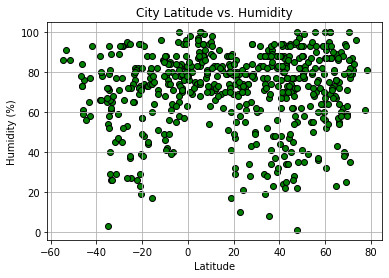

In [22]:
# Build scatter plot for latitude vs. humidity
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"], marker="o", facecolors="green", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsHumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

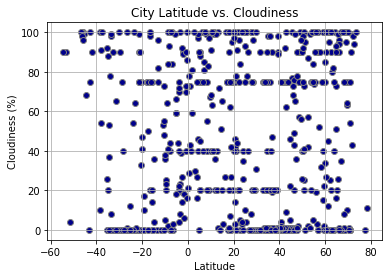

In [26]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", facecolors="darkblue", edgecolors="gray")

# Format scatter plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsCloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

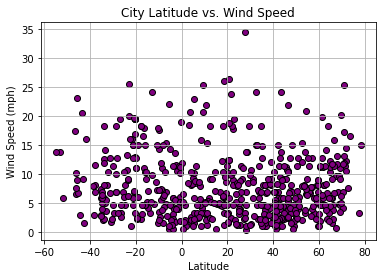

In [28]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", facecolors="purple", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsWindSpeed.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression